In [1]:
USE_MP=False
import silq
silq.initialize("EWJN")

qc.show_subprocess_widget()
%matplotlib nbagg

Initializing imports


<IPython.core.display.Javascript object>

Initializing functions
Initializing instruments
Connected to: Agilent Technologies E8267D (serial:SG53400039, firmware:C.06.22) in 0.09s
Initializing layout
Initializing data
Initializing analysis
Initializing parameters
Initializing plotting
Initialization complete


<IPython.core.display.Javascript object>


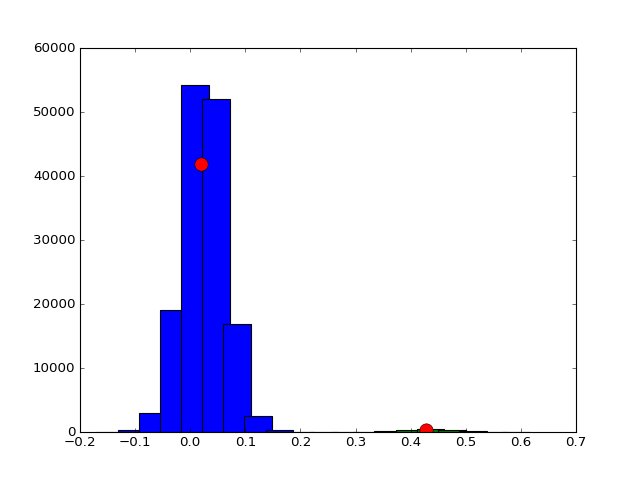

In [2]:
ELR_parameter.setup(samples=30)
ELR_parameter()
traces_read = ELR_parameter.trace_segments['output']['read']
_, _, threshold_voltage = analysis.find_high_low(traces_read, plot=True)

In [26]:
steered_initialization = SteeredInitialization(name='steered_initialization',
                                               t_no_blip=50, t_max_wait=200, t_buffer=0.5)
load_pulse = DCPulse(name='load', amplitude=1.5,
                     duration=5, acquire=True)
read_pulse = DCPulse(name='read', amplitude=0,
                      duration=50, acquire=True)
final_pulse = DCPulse(name='final', amplitude=0,
                      duration=2)
pulses = [steered_initialization, load_pulse, read_pulse, final_pulse]
pulse_sequence = PulseSequence(pulses=pulses)

layout.target_pulse_sequence(pulse_sequence)

layout.setup(samples=3,
             readout_threshold_voltage=threshold_voltage)

In [27]:
layout.do_acquisition()

[array([[-2., -2., -2., ..., -2., -2., -2.],
        [-2., -2., -2., ..., -2., -2., -2.],
        [-2., -2., -2., ..., -2., -2., -2.]]),
 array([[-2., -2., -2., ..., -2., -2., -2.],
        [-2., -2., -2., ..., -2., -2., -2.],
        [-2., -2., -2., ..., -2., -2., -2.]]),
 array([[-2., -2., -2., ..., -2., -2., -2.],
        [-2., -2., -2., ..., -2., -2., -2.],
        [-2., -2., -2., ..., -2., -2., -2.]])]

In [28]:
steered_controller.record_initialization_traces(True)

# For PyCharm console

In [ ]:
USE_MP=False
import silq
silq.initialize("EWJN")


ELR_parameter.setup(samples=50)
ELR_parameter()
traces_read = ELR_parameter.trace_segments['output']['read']
_, _, threshold_voltage = analysis.find_high_low(traces_read, plot=True)


steered_initialization = SteeredInitialization(name='steered_initialization',
                                               t_no_blip=50, t_max_wait=200, t_buffer=5)
load_pulse = DCPulse(name='load', amplitude=1.5,
                     duration=5, acquire=True)
read_pulse = DCPulse(name='read', amplitude=0,
                      duration=50, acquire=True)
final_pulse = DCPulse(name='final', amplitude=0,
                      duration=2)
pulses = [steered_initialization, load_pulse, read_pulse, final_pulse]
pulse_sequence = PulseSequence(pulses=pulses)

layout.target_pulse_sequence(pulse_sequence)

layout.setup(samples=3,
             readout_threshold_voltage=threshold_voltage)